# Sign Language Model Detector

### Regarding the Project

##### DataSet
* Same Image Size
* Similar Background
* Intensity range
* Distributed Based on letter Presentation

##### Split Data
* Single Train/Val/Test 66%/17.5%/17.5%

##### Implement Optimizers
* Improve Runtime Due to CPU usage (Mac core)

##### Metrics
* Accuracy
* Confusion Matrix
* ROC Curve
* f1 Score

##### Set your callbacks and track the experiments
* Early stopping - patience
* Model check point
* Learning rate scheduler

##### Set the main hyperparameters
* batch size
* learning rate
* number of epochs

##### Train Model
* Adam as Optimizer
* Batch Size = 64
* Using TensorFlow

##### Implement Test
* Apply Predictions
* Extract relavent metrics
* Measure inference Time

#### Approach 1

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.utils import to_categorical
from glob import glob
from random import sample
from random import random

2023-05-10 22:02:45.952452: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
class_names = [
    "A",
    "B",
    "C",
    "D",
    "E",
    "F",
    "G",
    "H",
    "I",
    "J",
    "K",
    "L",
    "M",
    "N",
    "O",
    "P",
    "Q",
    "R",
    "S",
    "T",
    "U",
    "V",
    "W",
    "X",
    "Y",
    "Z",
    "del",
    "nothing",
    "space",
]

# Paths to the downloaded dataset
train_dir = "/Users/ferasdahrooge/Documents/WInter 2023/sign_language_detector/asl_dataset/asl-alphabet/asl_alphabet_train/asl_alphabet_train"

IMG_SIZE = (64, 64)
target_dims = (IMG_SIZE, IMG_SIZE, 3)
BATCH_SIZE = 64

# set the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode="categorical",
)

Found 87000 files belonging to 29 classes.


2023-05-10 22:02:58.056301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


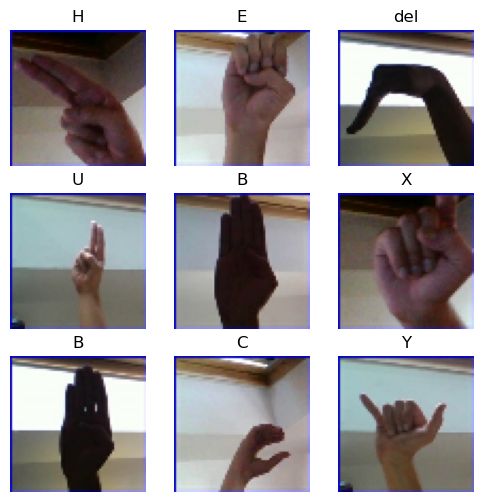

In [5]:
class_names = train_dataset.class_names

plt.figure(figsize=(6, 6))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

### Split the Data 

In [35]:
training_batch = tf.data.experimental.cardinality(train_dataset)
number_of_batches = training_batch // 2
test_dataset = train_dataset.take(number_of_batches)
test_dataset = train_dataset.skip(number_of_batches)

print(
    "Number of training batches: %d"
    % tf.data.experimental.cardinality(train_dataset)
)
print(
    "Number of test batches: %d"
    % tf.data.experimental.cardinality(test_dataset)
)

Number of training batches: 1360
Number of test batches: 680


#### Split the testing dataset into validation dataset and testing dataset

In [36]:
number_of_batches_for_validation = number_of_batches // 2
validation_dataset = test_dataset.take(number_of_batches_for_validation)
test_dataset = test_dataset.skip(number_of_batches_for_validation)

print(
    "Number of validation batches: %d"
    % tf.data.experimental.cardinality(validation_dataset)
)
print(
    "Number of test batches: %d"
    % tf.data.experimental.cardinality(test_dataset)
)

Number of validation batches: 340
Number of test batches: 340


#### Apply AutoTune to Improve Training Runtime

In [37]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

#### Define the Function to Preprocess the Data

In [40]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

#### Import Package for Model

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


#### Build CNN Model

In [42]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(254, activation='relu'))
model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    